In [47]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt

In [48]:
import numpy as np
np.random.seed(42)                            
steps = np.random.standard_normal(500)       
steps[0]=0                                   
random_walk = np.cumsum(steps)                

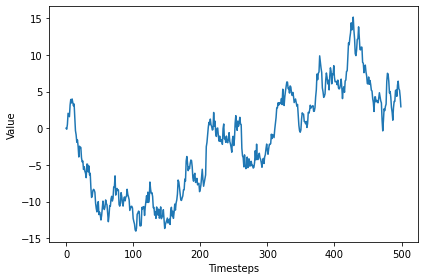

In [49]:
fig, ax = plt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()


# Lets Check for stationary behaviour of data

In [50]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [51]:
ADF_result = adfuller(random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.4986304785036462
p-value: 0.5341887124972032


# since adf statistic is more negative and  p value is greater than 0.05  the data is non-stationary

# Lets CHeck for Random Walk

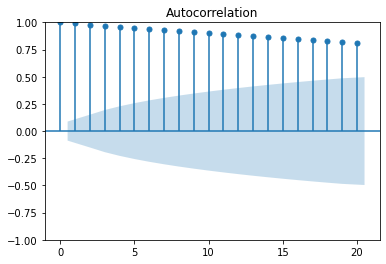

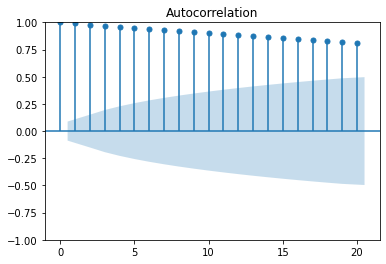

In [52]:
plot_acf(random_walk, lags=20)

# since the points are outside the shaded region we conclude that autocorrelation is significant hence its not a RANDOM WALk

# lets make the data stationary  by taking first differentiation

In [53]:
diff_random_walk = np.diff(random_walk, n=1)

In [54]:
ADF_result = adfuller(diff_random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -22.31302558381502
p-value: 0.0


# now since p value<0.05 and adf statistic is less negative that is more in absolute value we have made the data stationary 

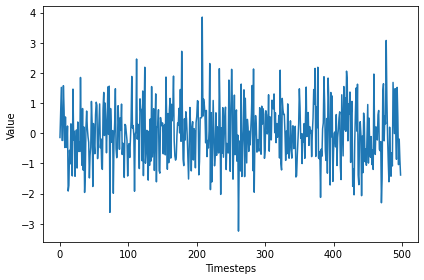

In [55]:
fig, ax = plt.subplots()
ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

# Lets check for random walk now

# To check for random walk lets check the autocorrelation 

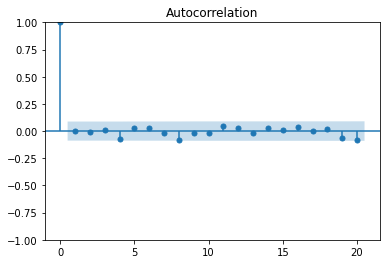

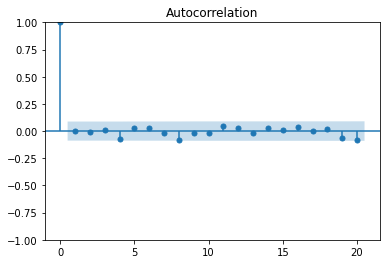

In [56]:
plot_acf(diff_random_walk, lags=20)

# since the points are with in the shaded region the autocorrelation is not significant hence the data is now  a Random Walk

# Lets calculate the MSE

In [57]:
cols=['Random_Values']
idx=pd.RangeIndex(0,500)
data=random_walk
df=pd.DataFrame(data,columns=cols,index=idx)
df

,Random_Values
0,0.000000
1,-0.138264
2,0.509424
3,2.032454
4,1.798301
...,...
495,6.408286
496,5.371040
497,5.180701
498,4.305083


In [59]:
x_train=df['Random_Values'].iloc[:400]
x_test=df['Random_Values'].iloc[400:]

In [60]:
new_df=df[400:]
new_df['his_mean']=x_train.mean()
new_df

,Random_Values,his_mean
400,6.928303,-3.987381
401,6.328928,-3.987381
402,6.334171,-3.987381
403,6.381152,-3.987381
404,5.931086,-3.987381
...,...,...
495,6.408286,-3.987381
496,5.371040,-3.987381
497,5.180701,-3.987381
498,4.305083,-3.987381


In [62]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=new_df['Random_Values']
y_test=new_df['his_mean']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 189.83
MSE = 12393.2
RMSE = 1113.25


# Last Value

In [63]:
x_train=df['Random_Values'][:400]
a=x_train[-1:].iloc[0]
a

8.522730192347062

In [64]:
last_df=df[400:]
last_df['Last_Value']=a
last_df

,Random_Values,Last_Value
400,6.928303,8.52273
401,6.328928,8.52273
402,6.334171,8.52273
403,6.381152,8.52273
404,5.931086,8.52273
...,...,...
495,6.408286,8.52273
496,5.371040,8.52273
497,5.180701,8.52273
498,4.305083,8.52273


In [65]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=last_df['Random_Values']
y_test=last_df['Last_Value']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 110.92
MSE = 1542.45
RMSE = 392.74


In [66]:
400-30


370

# Last One Month Mean

In [68]:
x_train=df['Random_Values'][:400]
a=x_train[-30:].mean()
a

6.444037863561947

In [70]:
m_df=df[400:]
m_df['Month_Mean']=a
m_df

,Random_Values,Month_Mean
400,6.928303,6.444038
401,6.328928,6.444038
402,6.334171,6.444038
403,6.381152,6.444038
404,5.931086,6.444038
...,...,...
495,6.408286,6.444038
496,5.371040,6.444038
497,5.180701,6.444038
498,4.305083,6.444038


In [74]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=m_df['Random_Values']
y_test=m_df['Month_Mean']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 75.06
MSE = 1177.05
RMSE = 343.08


# Last Value with next time stamp

In [75]:
x_train=df['Random_Values'][:400]
a=x_train[-1:].iloc[0]
a

8.522730192347062

In [77]:
next_ts=df[400:]
next_ts

,Random_Values
400,6.928303
401,6.328928
402,6.334171
403,6.381152
404,5.931086
...,...
495,6.408286
496,5.371040
497,5.180701
498,4.305083


In [78]:
def lagging_column(next_ts, Close, lag_periods=1):
    next_ts['next_value'] = next_ts['Random_Values'].shift(lag_periods)
    return next_ts

In [79]:
next_ts= lagging_column(next_ts, 'Random_Values', lag_periods=1)

In [80]:
next_ts['next_value']=next_ts['next_value'].fillna(a)
next_ts

,Random_Values,next_value
400,6.928303,8.522730
401,6.328928,6.928303
402,6.334171,6.328928
403,6.381152,6.334171
404,5.931086,6.381152
...,...,...
495,6.408286,5.869376
496,5.371040,6.408286
497,5.180701,5.371040
498,4.305083,5.180701


In [81]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=next_ts['Random_Values']
y_test=next_ts['next_value']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 22.53
MSE = 112.33
RMSE = 105.99


# By consider last Value with next time stamp it is observed that MSE reduced to a great extent

# forecast plotting

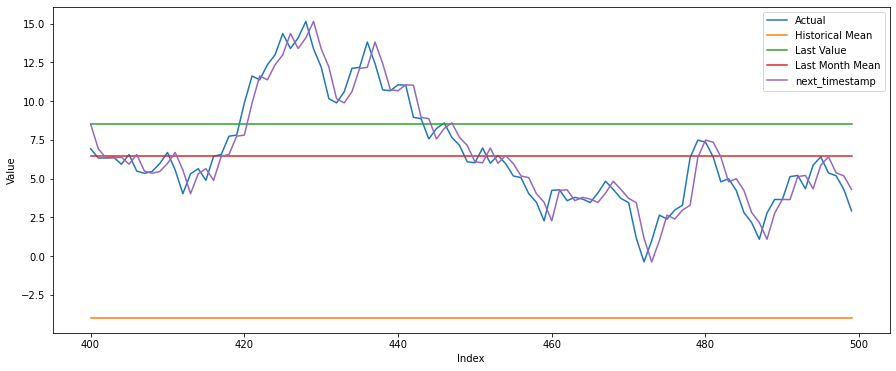

In [91]:
plt.figure(figsize=(15, 6)) 
plt.plot(new_df['Random_Values'], label='Actual')
plt.plot(new_df['his_mean'], label='Historical Mean')
plt.plot(last_df['Last_Value'], label='Last Value ')
plt.plot(m_df['Month_Mean'], label='Last Month Mean')
plt.plot(next_ts['next_value'], label='next_timestamp')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()